## World Health Organization(WHO) has estimated 12 million deaths occur worldwide.

    Every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. 


## Heart Disease Is World's No. 1 Killer
    All over the world ,in all ages, there is a lot of people catch heart diseases without noticing. It is only been detected at a late stage.

    Heart disease cases nearly doubled over the period from 271 million in 1990 to 523 million in 2019, and the number of heart disease deaths rose from 12.1 million to 18.6 million
**`How can we reduce the Heart diseases death rate?`**


    The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications.
    I Aim to deploy a machine learning model that can predict whether the person may have a heart disease or not.



In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from warnings import filterwarnings
filterwarnings("ignore")

###  EDA


In [128]:
df = pd.read_csv('heart.csv',sep=',',encoding="utf-8")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



_____________________
**`sex : 1 = Male , 0=Female`**

_____________________
**`cp : Chest Pain`**

    Angina: Angina is caused when there is not enough oxygen-rich blood flowing to a certain part of the heart. The arteries of the heart become narrow due to fatty deposits in the artery walls. The narrowing of arteries means that blood supply to the heart is reduced, causing angina.
    Value 1: typical angina || Value 2: atypical angina || Value 3: non-anginal pain || 4: asymptomatic
    

_____________________
**`threstbps :Resting blood pressure`**

    ( Normal pressure with no exercise )
 
 
_____________________
**`chol: serum cholestoral in mg/dl`**

    Cholesterol means the blockage for blood supply in the blood vessels


_____________________
**`fbs: fasting blood sugar > 120 mg/dl`**

    (1 = true; 0 = false) blood sugar taken after a long gap between a meal and the test. Typically, it's taken before any meal in the morning.
    
    
_____________________
**`restecg: resting electrocardiographic results (values 0,1,2)`**

     ECG values taken while person is on rest which means no exercise and normal functioning of heart is happening
         
_____________________
**`thalach: maximum heart rate achieved`**
          
_____________________
**`exang: exercise induced angina`**

    (1 = yes; 0 = no) is chest pain while exercising or doing any physical activity.

_____________________
**`oldpeak = ST depression induced by exercise relative to rest`**

    ST Depression is the difference between value of ECG at rest and after exercise.
    An electrocardiogram records the electrical signals in your heart. It's a common and painless test used to quickly detect heart problems and monitor your heart's health. Electrocardiograms — also called ECGs or EKGs — are often done in a doctor's office, a clinic or a hospital room. ECG machines are standard equipment in operating rooms and ambulances. Some personal devices, such as smart watches, 
     
_____________________
**`slope:	the slope of the peak exercise ST segment`**
   
    Value 1: upsloping — Value 2: flat — Value 3: downsloping
 
_____________________
**`ca:	number of major vessels (0-3) colored by flourosopy`**

    Fluoroscopy is an imaging technique that uses X-rays to obtain real-time moving images of the interior of an object. In its primary application of medical imaging, a fluoroscope (/ˈflʊərəskoʊp/) allows a physician to see the internal structure and function of a patient, so that the pumping action of the heart or the motion of swallowing, for example, can be watched

_____________________
**`thal:The Types of thalassemia`**
 
    (3 = normal; 6 = fixed defect; 7 = reversable defect)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [130]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [131]:
df.shape

(303, 14)

In [132]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [133]:
df.apply(lambda x:len(x.unique()))


age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [134]:
print('cp ',df['cp'].unique())
print('fbs ',df['fbs'].unique())
print('restecg ',df['restecg'].unique())
print('exang ',df['exang'].unique())
print('slope ',df['slope'].unique())
print('ca ',df['ca'].unique())
print('thal ',df['thal'].unique())


cp  [3 2 1 0]
fbs  [1 0]
restecg  [0 1 2]
exang  [0 1]
slope  [0 2 1]
ca  [0 2 1 3 4]
thal  [1 2 3 0]


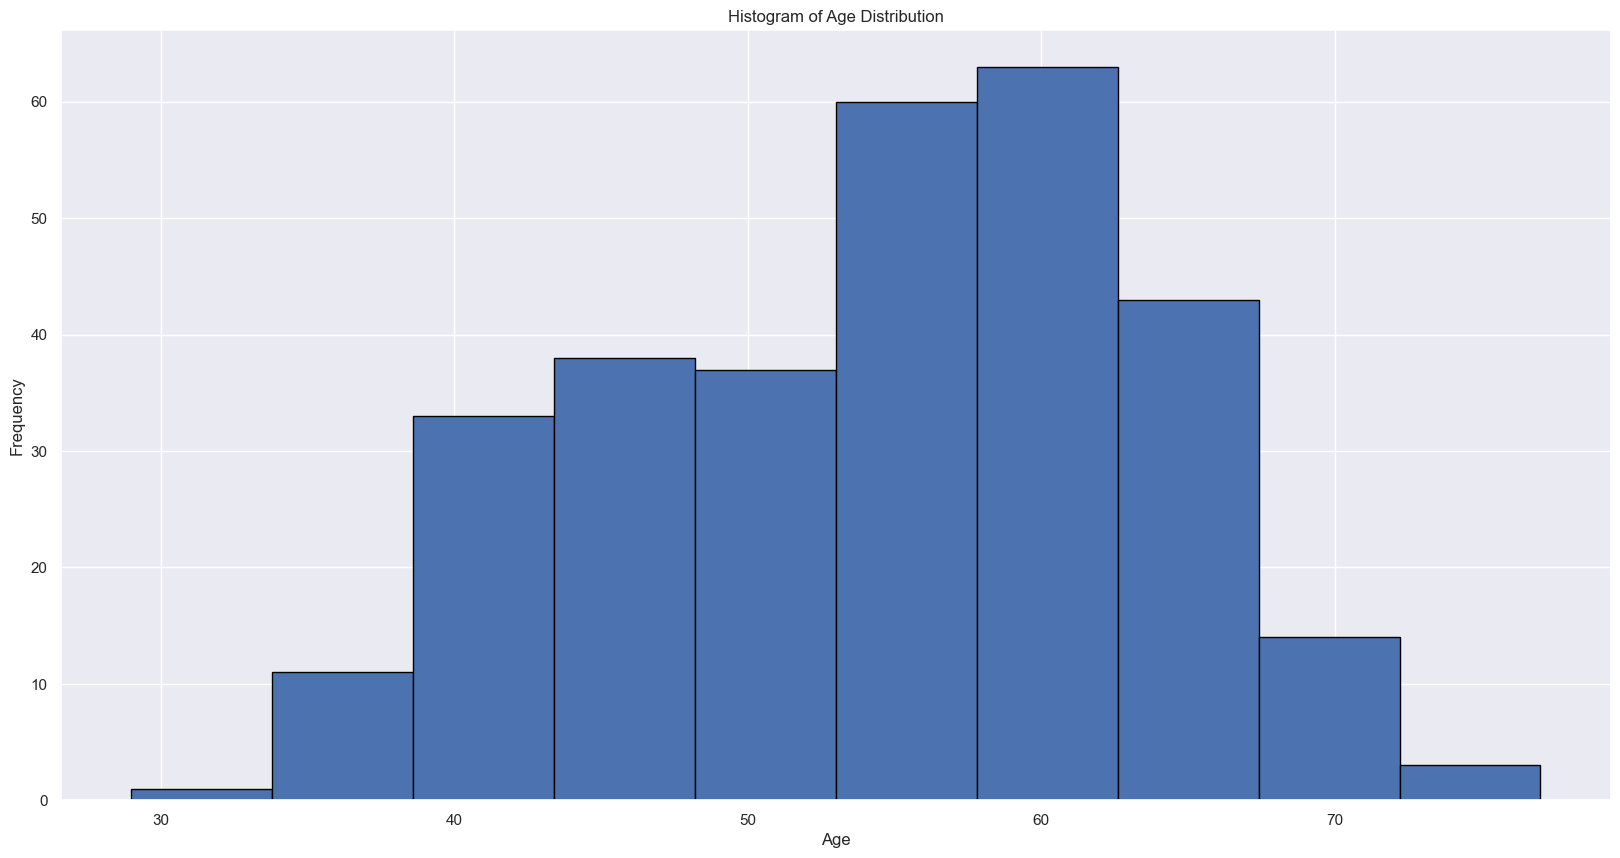

In [135]:
import matplotlib.pyplot as plt

# Assuming 'age' is a column in your DataFrame
plt.hist(df['age'], bins=None, density=False, edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution')

# Show the plot
plt.show()


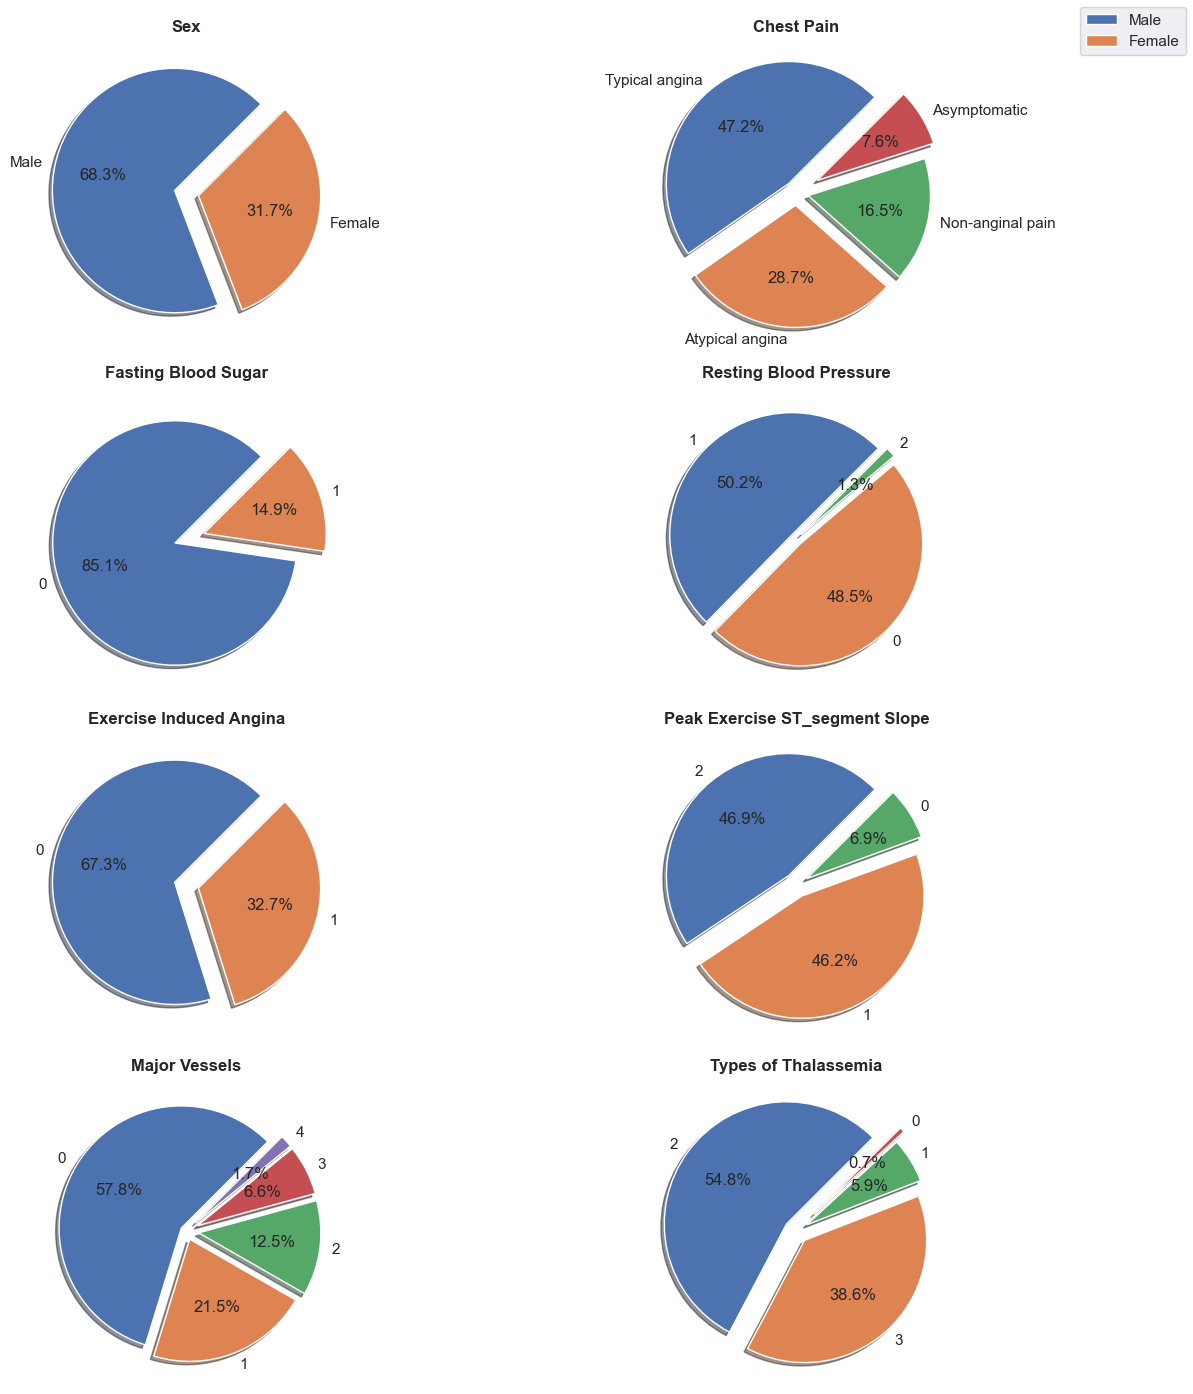

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, ax = plt.subplots(4, 2, figsize=(14, 14))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = ax

# Pie chart for 'Sex'
labels = ["Male", "Female"]
values = df['sex'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45, explode=[0.1, 0.1])
ax1.set_title("Sex", fontdict={'fontsize': 12}, fontweight='bold')

# Pie chart for 'Chest Pain'
labels = ["Typical angina", "Atypical angina", "Non-anginal pain", "Asymptomatic"]
values = df['cp'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45, explode=[0.1, 0.1, 0.1, 0.2])
ax2.set_title("Chest Pain", fontdict={'fontsize': 12}, fontweight='bold')

# Pie chart for 'Fasting Blood Sugar'
labels = df['fbs'].value_counts().index.tolist()[:2]
values = df['fbs'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45, explode=[0.1, 0.15])
ax3.set_title("Fasting Blood Sugar", fontdict={'fontsize': 12}, fontweight='bold')

# Pie chart for 'Resting Blood Pressure'
labels = df['restecg'].value_counts().index.tolist()[:3]
values = df['restecg'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45, explode=[0.05, 0.05, 0.05])
ax4.set_title("Resting Blood Pressure", fontdict={'fontsize': 12}, fontweight='bold')

# Pie chart for 'Exercise Induced Angina'
labels = df['exang'].value_counts().index.tolist()[:2]
values = df['exang'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45, explode=[0.1, 0.1])
ax5.set_title("Exercise Induced Angina", fontdict={'fontsize': 12}, fontweight='bold')

# Pie chart for 'Peak Exercise ST_segment Slope'
labels = df['slope'].value_counts().index.tolist()[:3]
values = df['slope'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45, explode=[0.1, 0.1, 0.1])
ax6.set_title("Peak Exercise ST_segment Slope", fontdict={'fontsize': 12}, fontweight='bold')

# Pie chart for 'Major Vessels'
labels = df['ca'].value_counts().index.tolist()[:5]
values = df['ca'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45, explode=[0.05, 0.07, 0.1, 0.1, 0.1])
ax7.set_title("Major Vessels", fontdict={'fontsize': 12}, fontweight='bold')

# Pie chart for 'Types of Thalassemia'
labels = df['thal'].value_counts().index.tolist()[:4]
values = df['thal'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45, explode=[0.1, 0.1, 0.1, 0.2])
ax8.set_title("Types of Thalassemia", fontdict={'fontsize': 12}, fontweight='bold')

# Add a common legend
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

# Adjust layout and display plots
plt.tight_layout()
plt.savefig("PiePlots.png")
plt.show()


In [137]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

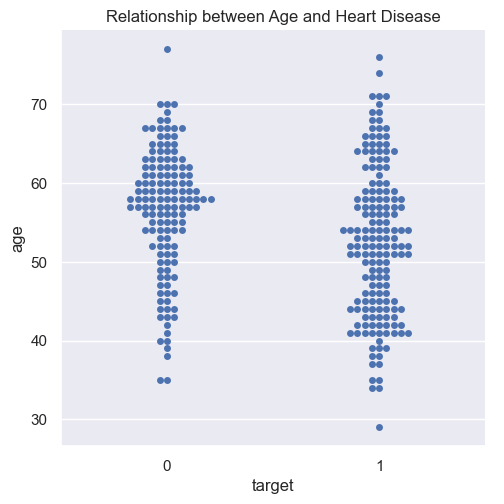

In [138]:
sns.catplot(x='target', y='age', data=df, kind='swarm')
plt.title('Relationship between Age and Heart Disease')
plt.savefig("age.png")


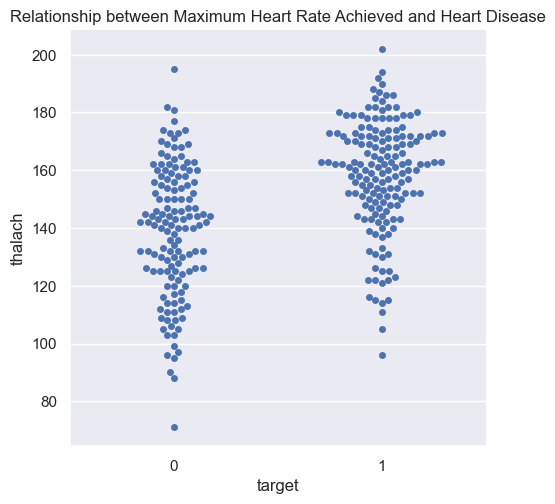

In [139]:
sns.catplot(x='target', y='thalach', data=df, kind='swarm')
plt.title('Relationship between Maximum Heart Rate Achieved and Heart Disease')
plt.savefig("thalach.png")

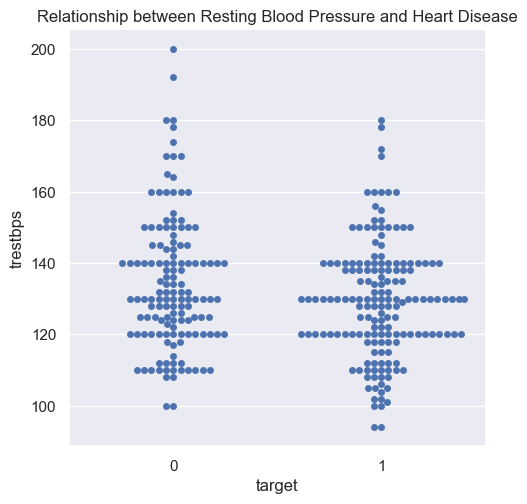

In [140]:
sns.catplot(x='target', y='trestbps', data=df, kind='swarm')
plt.title('Relationship between Resting Blood Pressure and Heart Disease')
plt.savefig("trestbps.png")

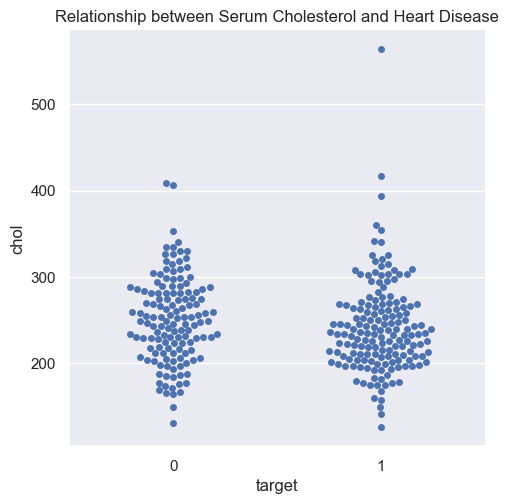

In [141]:
sns.catplot(x='target', y='chol', data=df, kind='swarm')
plt.title('Relationship between Serum Cholesterol and Heart Disease')
plt.savefig("chol.png")

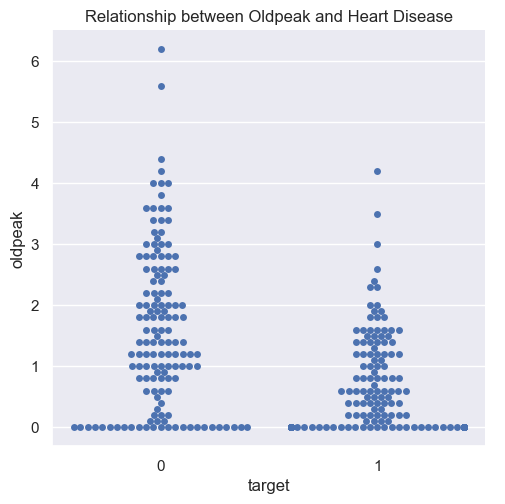

In [142]:
sns.catplot(x='target', y='oldpeak', data=df, kind='swarm')
plt.title('Relationship between Oldpeak and Heart Disease')
plt.savefig("oldpeak.png")

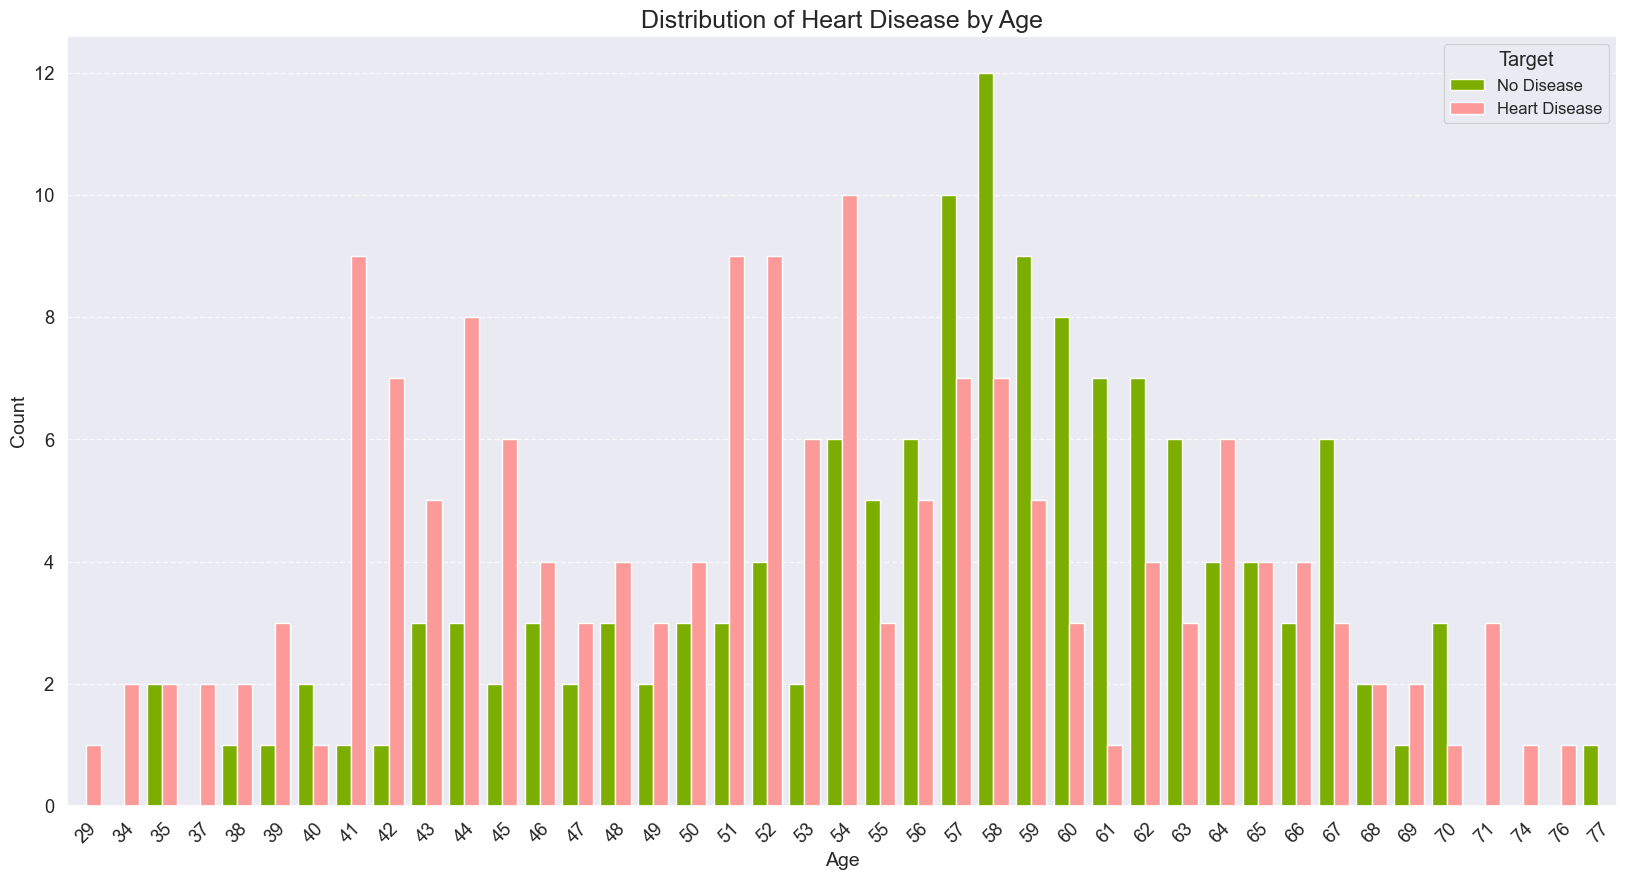

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a larger font size for better readability
sns.set(font_scale=1.2)

plt.figure(figsize=(20, 10))

# Use seaborn's countplot with different colors
sns.countplot(x='age', data=df, hue='target', palette=['#7CAE00', '#FB9A99'], saturation=2, dodge=True, order=sorted(df['age'].unique()))

# Title and labels with increased font size
plt.title('Distribution of Heart Disease by Age', fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Legend with increased font size and adjusted position
plt.legend(title='Target', labels=['No Disease', 'Heart Disease'], fontsize=12, loc='upper right')

# Save the figure before showing it
plt.savefig("Target_and_age.png")

# Show the plot
plt.show()


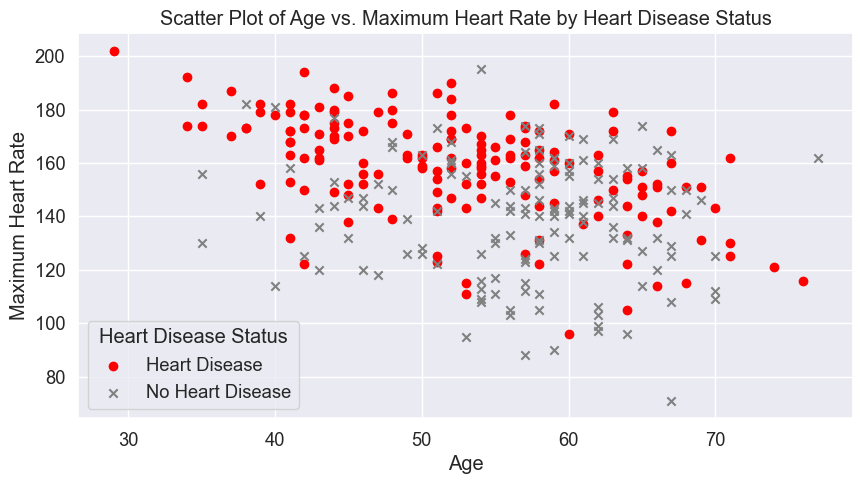

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Scatter plot for positive cases (target=1)
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c='red', marker='o', label='Heart Disease')

# Scatter plot for negative cases (target=0)
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c='gray', marker='x', label='No Heart Disease')

# Add titles and labels
plt.title('Scatter Plot of Age vs. Maximum Heart Rate by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')

# Add legend with title
plt.legend(title='Heart Disease Status')

# Show the plot
plt.show()


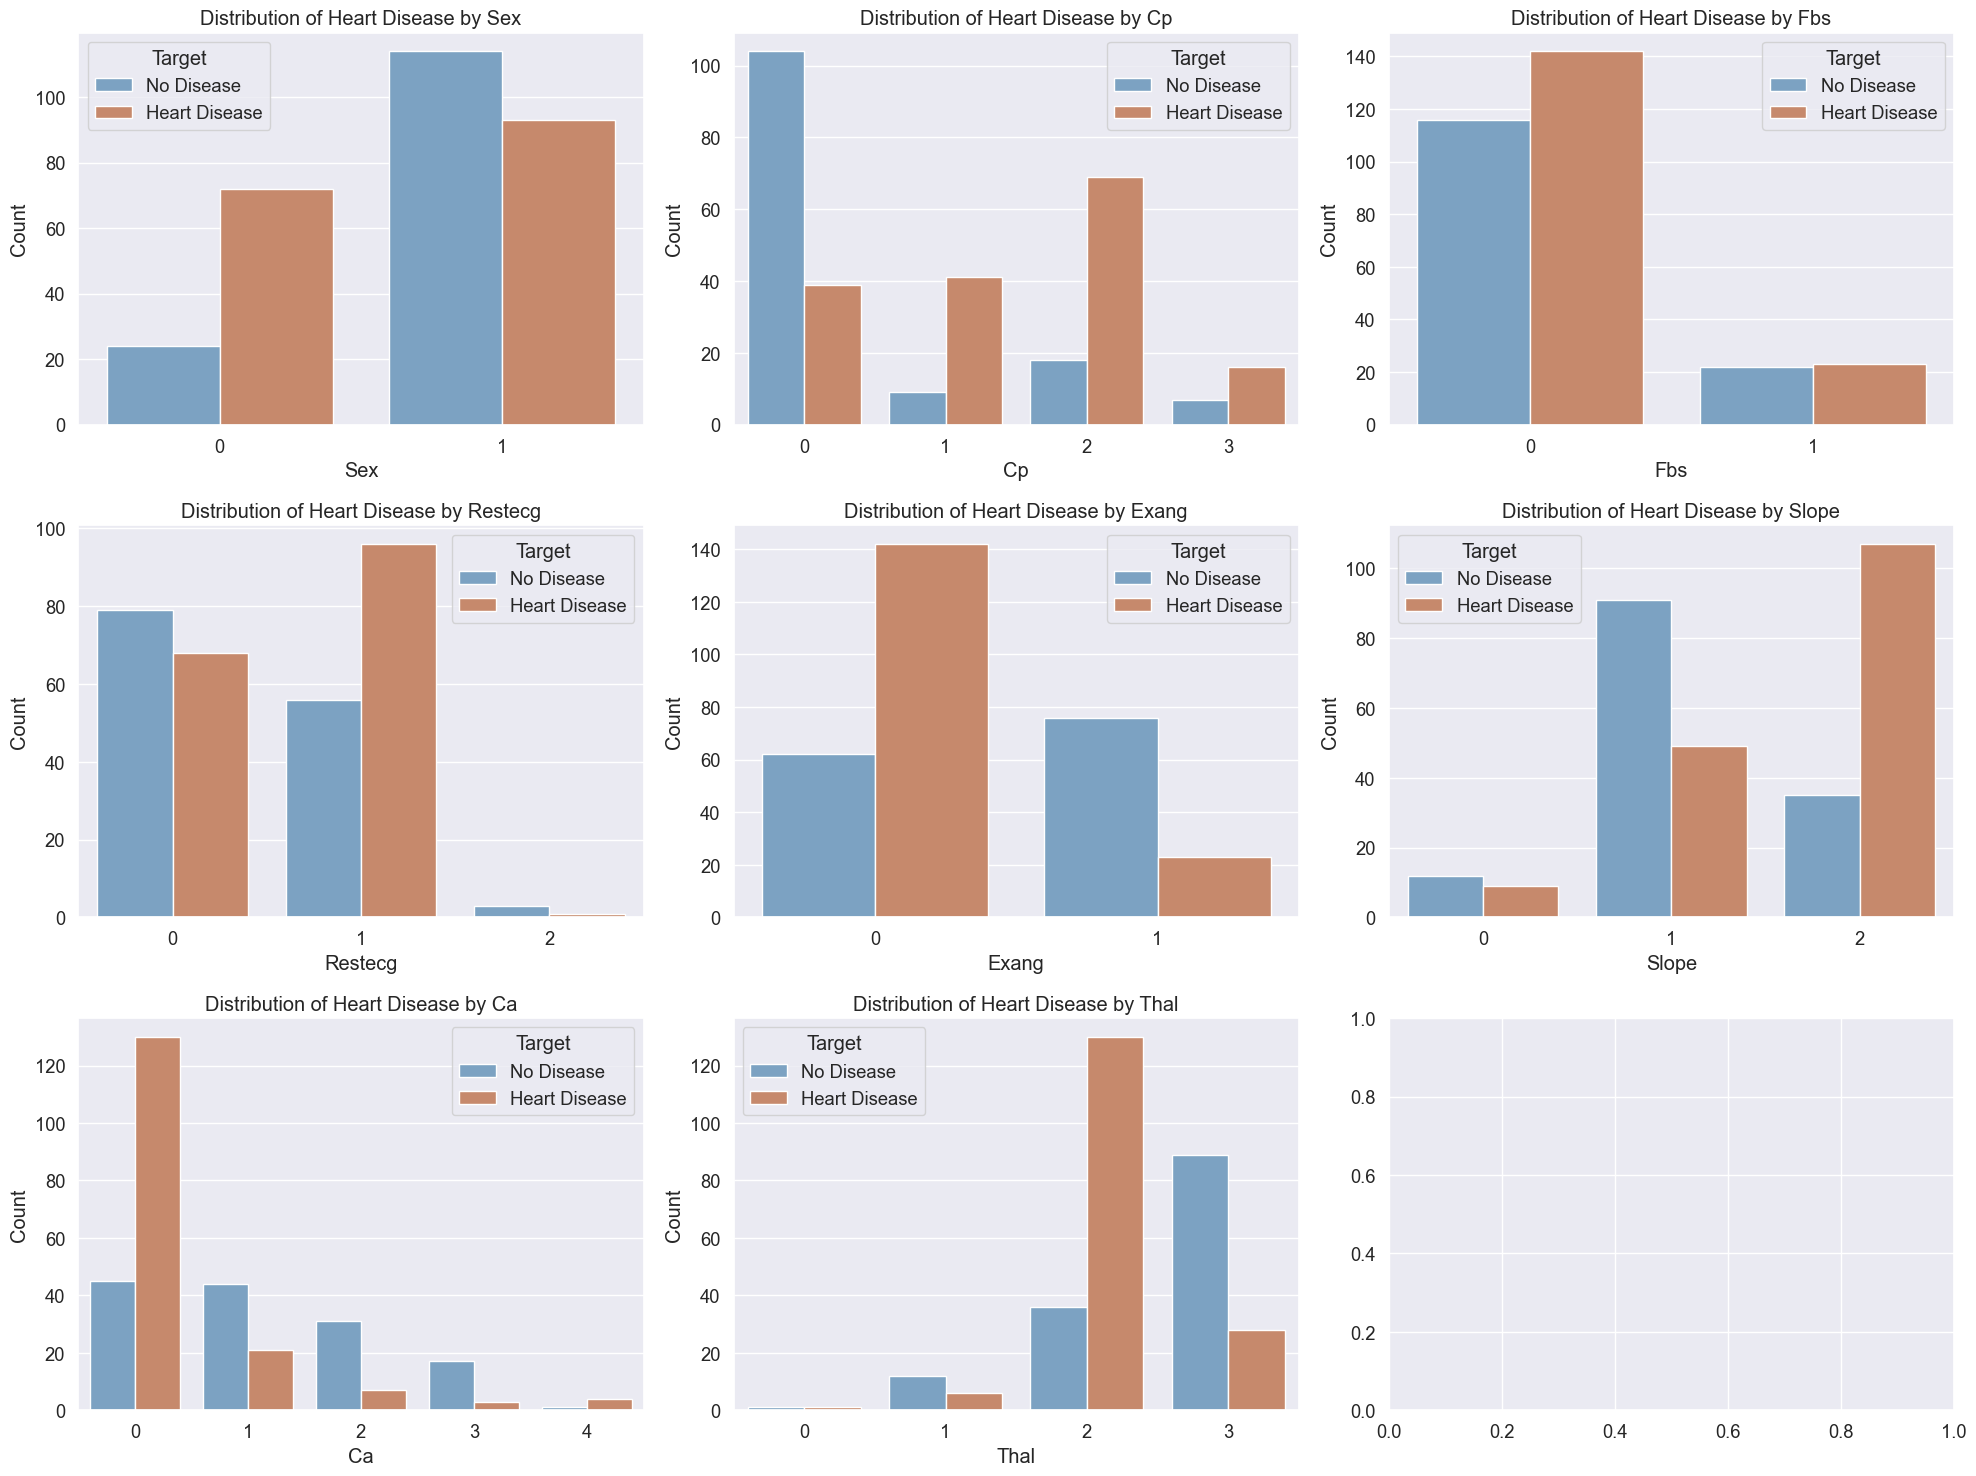

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical features
categories = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Set a larger font size for better readability
sns.set(font_scale=1.2)

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through each categorical feature
for i, category in enumerate(categories):
    sns.countplot(x=category, data=df, hue='target', palette='twilight_shifted', saturation=2, dodge=True, ax=axes[i])
    axes[i].set_title(f'Distribution of Heart Disease by {category.capitalize()}')
    axes[i].set_xlabel(category.capitalize())
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Target', labels=['No Disease', 'Heart Disease'])

# Adjust layout to avoid overlapping titles
plt.tight_layout()

# Save the figure before showing it
plt.savefig("TargetRelation.png")

# Show the plot
plt.show()


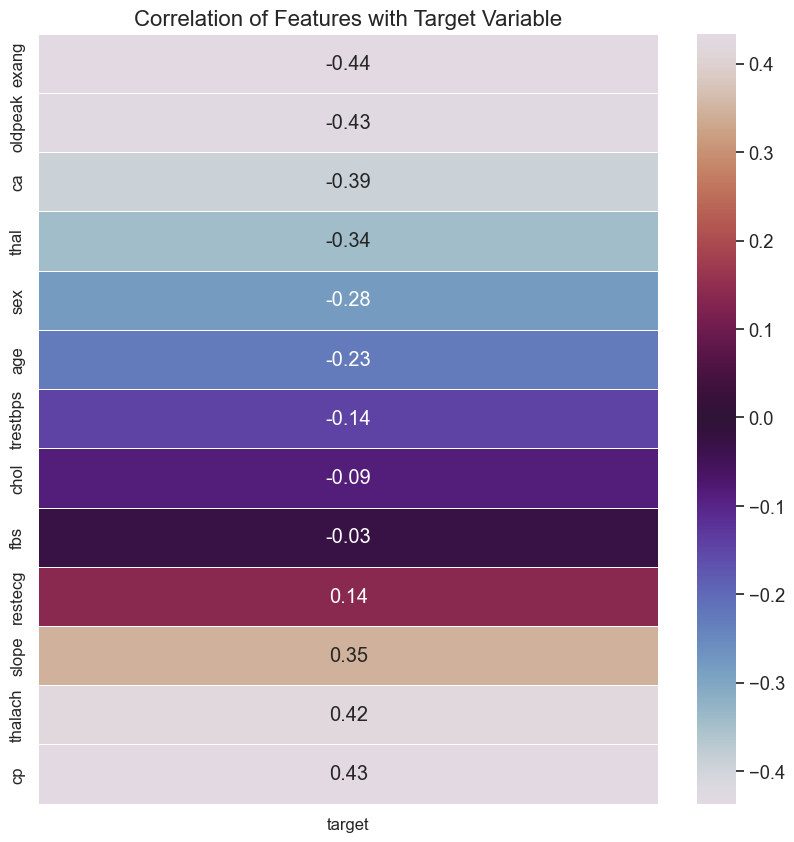

In [146]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10, 10))

# Sort the correlation values by 'target'
correlation_df = pd.DataFrame(df.corr()['target']).sort_values(by='target').transpose().drop('target', axis=1).transpose()

# Create a heatmap
sns.heatmap(correlation_df, annot=True, cmap='twilight', fmt=".2f", linewidths=.5)

# Add a title
plt.title('Correlation of Features with Target Variable', fontsize=16)

# Increase font size for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save the figure before showing it
plt.savefig("TargetCorrelations.png")

# Show the plot
plt.show()


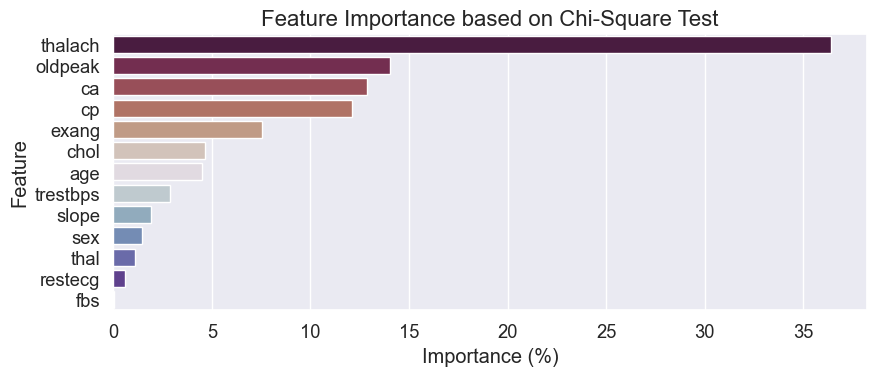

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2

# Select features and target
X = df.drop('target', axis=1)
Y = df['target']

# Feature selection using chi-square test
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X, Y)

# Calculate percentage importance
per = [(i / sum(fs.scores_)) * 100 for i in fs.scores_]

# Create a DataFrame for visualization
features_data = pd.DataFrame({'Feature': X.columns, 'Scores': fs.scores_, 'Importance (%)': per}).sort_values(by=['Scores'], ascending=False)

# Plotting
plt.figure(figsize=(9, 4))
sns.barplot(x='Importance (%)', y='Feature', data=features_data, palette='twilight_shifted_r')

# Add titles and labels
plt.title('Feature Importance based on Chi-Square Test', fontsize=16)
plt.xlabel('Importance (%)')
plt.ylabel('Feature')

# Adjust layout
plt.tight_layout()

# Save the figure before showing it
plt.savefig("FeatureImportance.png")

# Show the plot
plt.show()


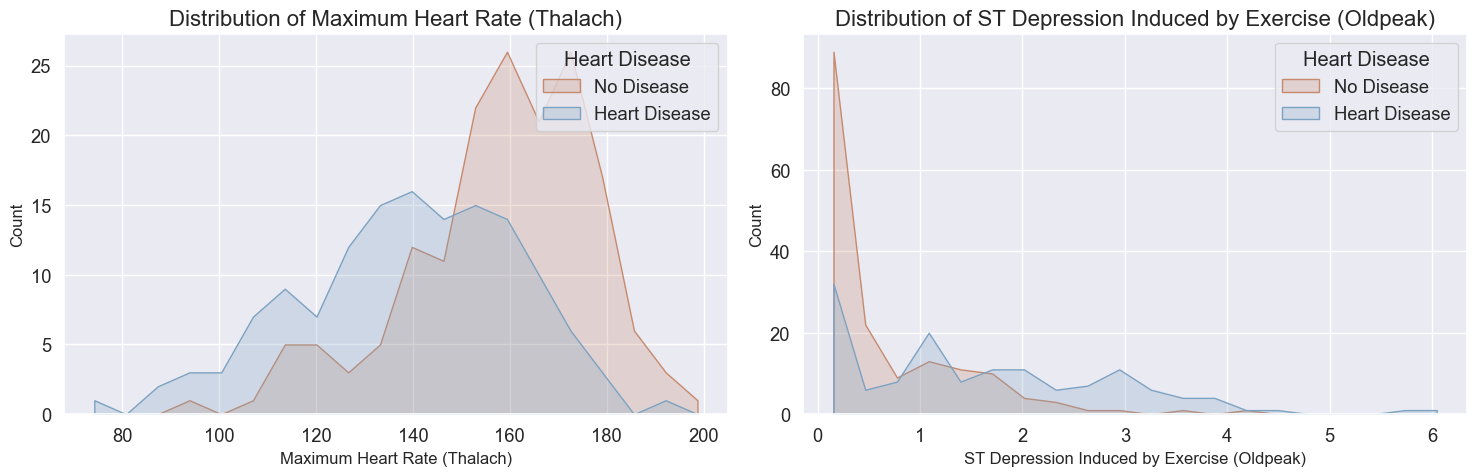

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
plt.figure(figsize=(15, 5))

# Subplot 1: Thalach Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df, hue='target', x='thalach', bins=20, element='poly', palette='twilight_shifted')

# Add title and labels
plt.title('Distribution of Maximum Heart Rate (Thalach)', fontsize=16)
plt.xlabel('Maximum Heart Rate (Thalach)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend
plt.legend(title='Heart Disease', labels=['No Disease', 'Heart Disease'])

# Subplot 2: Oldpeak Histogram
plt.subplot(1, 2, 2)
sns.histplot(data=df, hue='target', x='oldpeak', bins=20, element='poly', palette='twilight_shifted')

# Add title and labels
plt.title('Distribution of ST Depression Induced by Exercise (Oldpeak)', fontsize=16)
plt.xlabel('ST Depression Induced by Exercise (Oldpeak)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend
plt.legend(title='Heart Disease', labels=['No Disease', 'Heart Disease'])

# Adjust layout to avoid overlapping titles
plt.tight_layout()

# Save the figure before showing it
plt.savefig("Thalach&oldpeak_Histplot.png")

# Show the plot
plt.show()


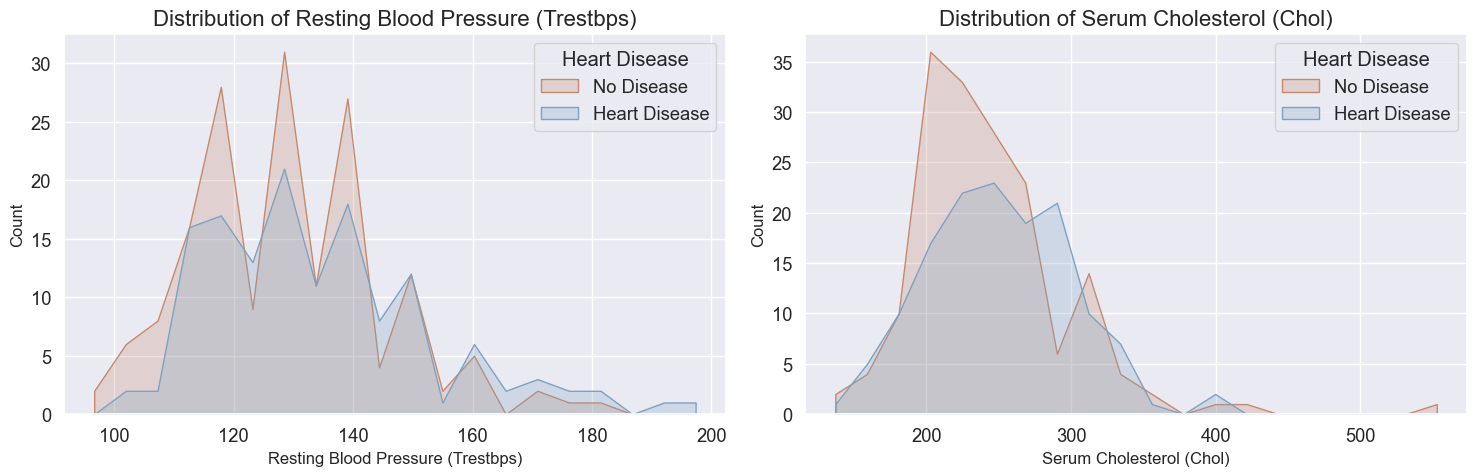

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
plt.figure(figsize=(15, 5))

# Subplot 1: Trestbps Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df, hue='target', x='trestbps', bins=20, element='poly', palette='twilight_shifted')

# Add title and labels
plt.title('Distribution of Resting Blood Pressure (Trestbps)', fontsize=16)
plt.xlabel('Resting Blood Pressure (Trestbps)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend
plt.legend(title='Heart Disease', labels=['No Disease', 'Heart Disease'])

# Subplot 2: Chol Histogram
plt.subplot(1, 2, 2)
sns.histplot(data=df, hue='target', x='chol', bins=20, element='poly', palette='twilight_shifted')

# Add title and labels
plt.title('Distribution of Serum Cholesterol (Chol)', fontsize=16)
plt.xlabel('Serum Cholesterol (Chol)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend
plt.legend(title='Heart Disease', labels=['No Disease', 'Heart Disease'])

# Adjust layout to avoid overlapping titles
plt.tight_layout()

# Save the figure before showing it
plt.savefig("Resting_blood_pressure&chol_Histplot.png")

# Show the plot
plt.show()


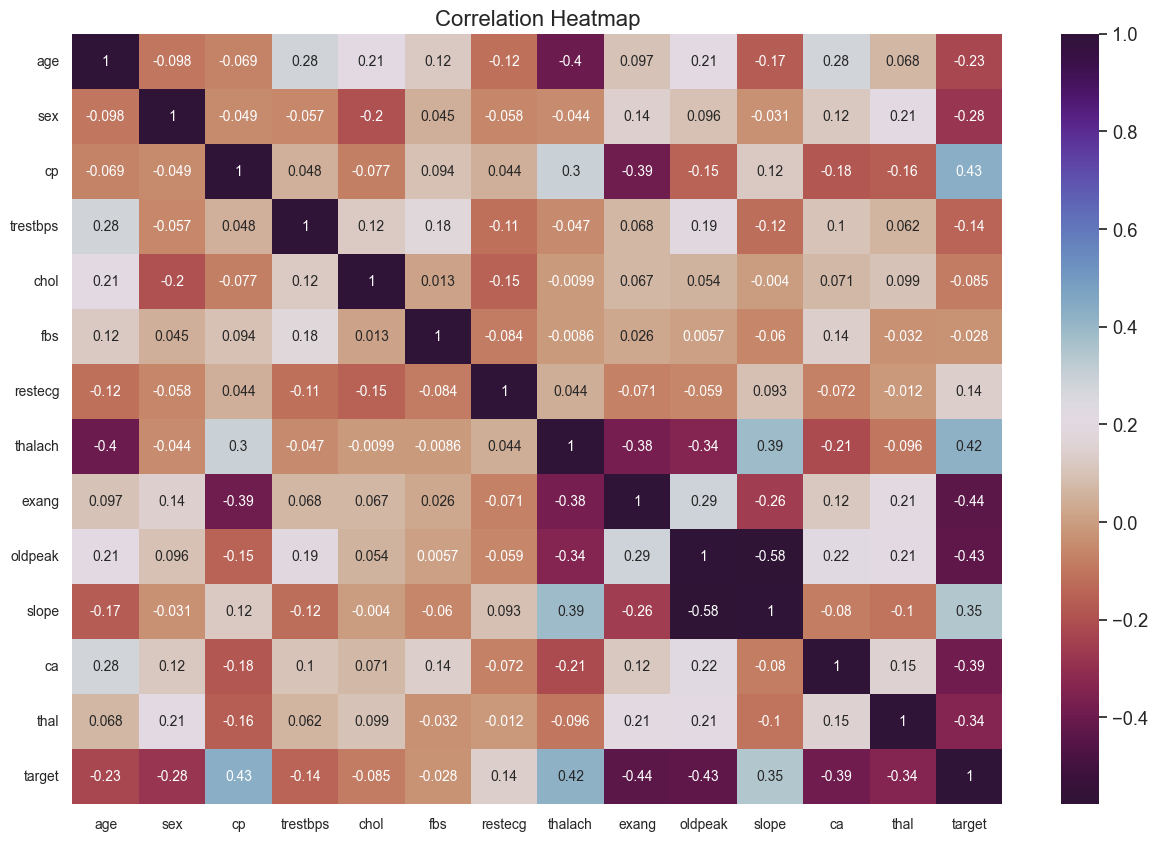

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure
plt.figure(figsize=(15, 10))

# Plot the heatmap
sns.heatmap(df.corr(), cbar=True, annot=True, cmap='twilight_shifted_r', annot_kws={'size': 10})

# Add a title
plt.title('Correlation Heatmap', fontsize=16)

# Adjust font size for better readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Rotate y-axis labels for better visibility
plt.yticks(rotation=0)

# Save the figure before showing it
plt.savefig("heatmap.png")

# Show the plot
plt.show()


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [152]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


___________________________________

# Modelling
___________________________

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,accuracy_score,roc_curve,roc_auc_score,recall_score
from sklearn.metrics import RocCurveDisplay

from mlxtend.plotting import plot_confusion_matrix

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import AdaBoostRegressor
from sklearn.feature_selection import SelectFwe, f_regression

In [154]:
X = df.drop('target',axis=1).values
Y = df['target'].values

In [155]:
X.shape

(303, 13)

In [156]:
Y.shape

(303,)

In [157]:
# Split the dataset into training and testing.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [158]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


------------------------
**` 1-LogisticRegression`**
----------------------

In [159]:
# Train and predict.
LL = LogisticRegression(solver='liblinear',max_iter = 1000, random_state = 31)
LL.fit(X_train,Y_train)
Y_pred_lr = LL.predict(X_test) 
y_pred_lr = np.around(Y_pred_lr)

In [160]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
score_lr

85.25

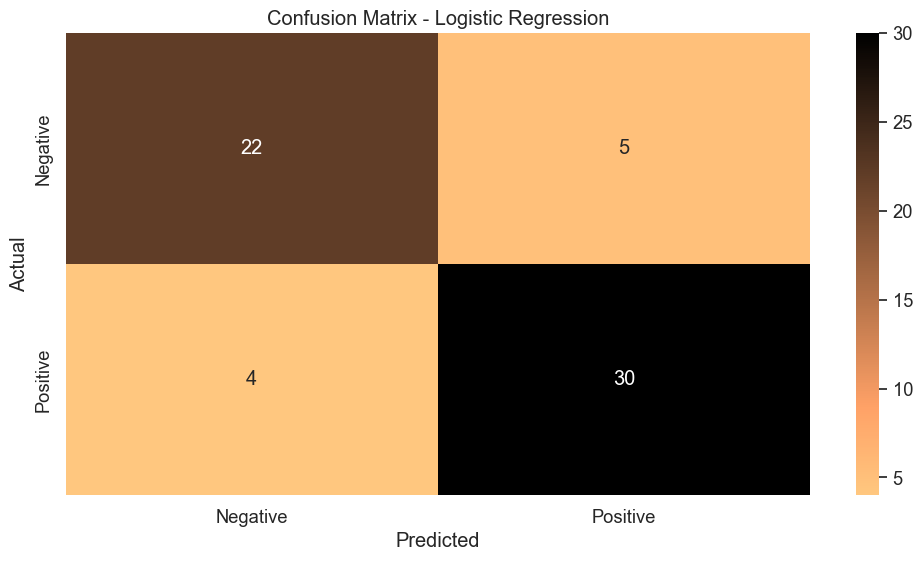

In [161]:
import seaborn as sns
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

# Confusion matrix
conf_mat = metrics.confusion_matrix(Y_test, Y_pred_lr)

# Plotting
plt.figure(figsize=(12, 6))
sns.set(font_scale=1.2)  # Adjust font size

# Use seaborn heatmap for better aesthetics
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='copper_r',
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')

# Save the plot
plt.savefig("LR_confusion_matrix.png")

# Show the plot
plt.show()


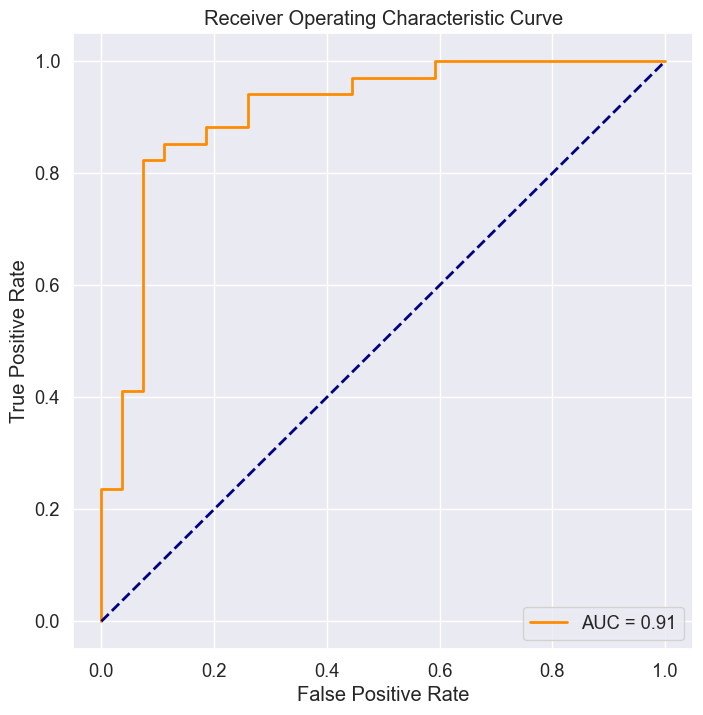

In [162]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have your trained model "LL", test data "X_test", and true labels "Y_test"

# Get predicted probabilities for the positive class
y_pred_proba = LL.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')

# Save figure
plt.savefig("LR.png")
# Show the plot
plt.show()


In [163]:
from sklearn import metrics
print(metrics.classification_report(Y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



------------------------
**` 2-SVM`**
----------------------

In [164]:
svm = SVC(C=8.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.01,
    shrinking=True,
    probability=True,
    tol=0.1,
    cache_size=300,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovo')
svm.fit(X_train,Y_train)
Y_pred_svm = svm.predict(X_test)         
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
score_svm

70.49

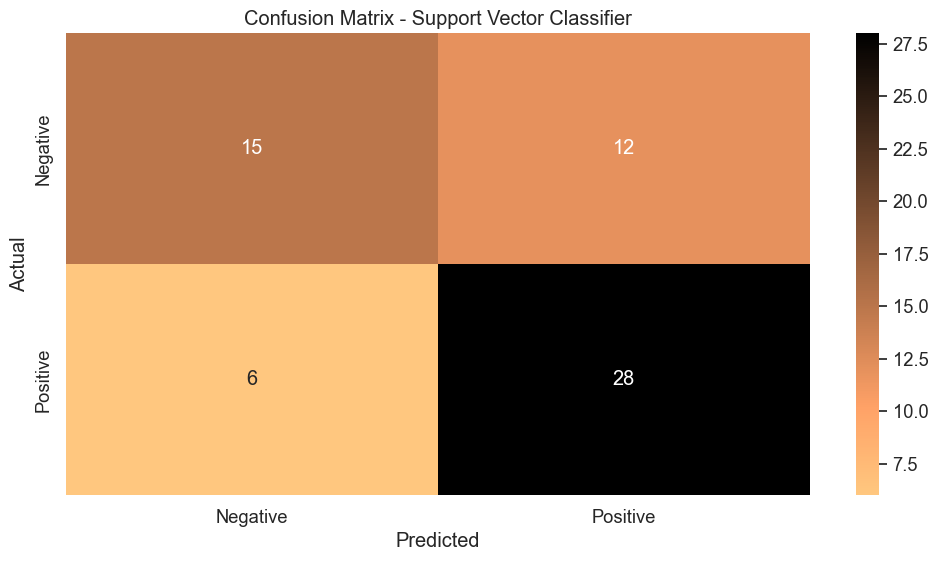

In [165]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have your true labels "Y_test" and predicted labels "Y_pred_svm"

# Calculate confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred_svm)

# Plotting
plt.figure(figsize=(12, 6))
sns.set(font_scale=1.2)  # Adjust font size

# Use seaborn heatmap for better aesthetics
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='copper_r',
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Support Vector Classifier')

# Save the plot
plt.savefig("SVC_confusion_matrix.png")

# Show the plot
plt.show()

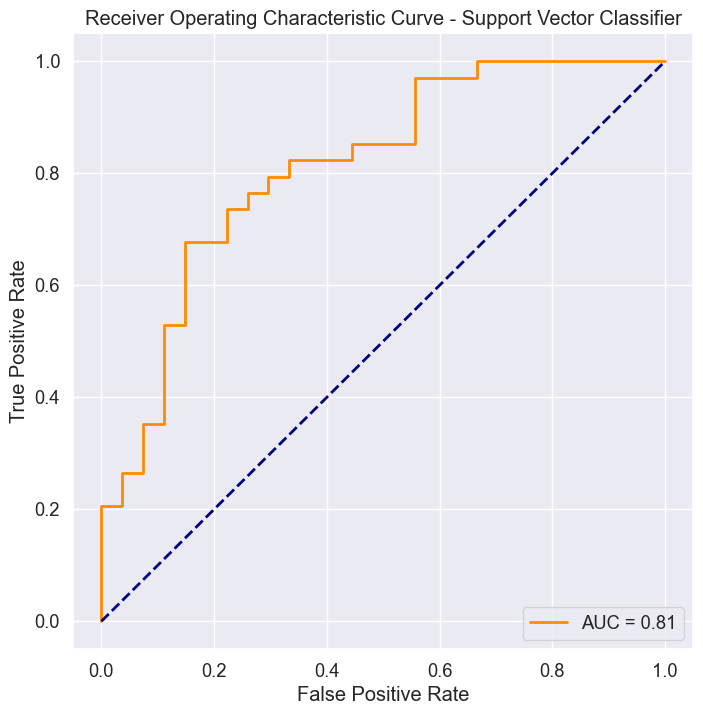

In [166]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have your trained model "svm", test data "X_test", and true labels "Y_test"

# Get predicted probabilities for the positive class
y_pred_proba = svm.decision_function(X_test)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve - Support Vector Classifier')
plt.legend(loc='lower right')

# Save figure
plt.savefig("SVC.png")

# Show the plot
plt.show()

In [167]:
Y_pred_svm = np.around(Y_pred_svm)
print(metrics.classification_report(Y_test,Y_pred_svm))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63        27
           1       0.70      0.82      0.76        34

    accuracy                           0.70        61
   macro avg       0.71      0.69      0.69        61
weighted avg       0.71      0.70      0.70        61



-----------------------
**`-3- RandomForestClassifier`**
--------------------

In [168]:
max_accuracy = 0


for x in range(500):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print(max_accuracy)
print(best_x)

90.16
323


In [169]:
print(X_train.shape, X_train.dtype, Y_train.shape, Y_train.dtype) 
print(X_test.shape, X_test.dtype, Y_test.shape, Y_test.dtype) 


(242, 13) float64 (242,) int64
(61, 13) float64 (61,) int64


In [170]:
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
Y_pred_rf.shape

(61,)

In [171]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
score_rf

90.16

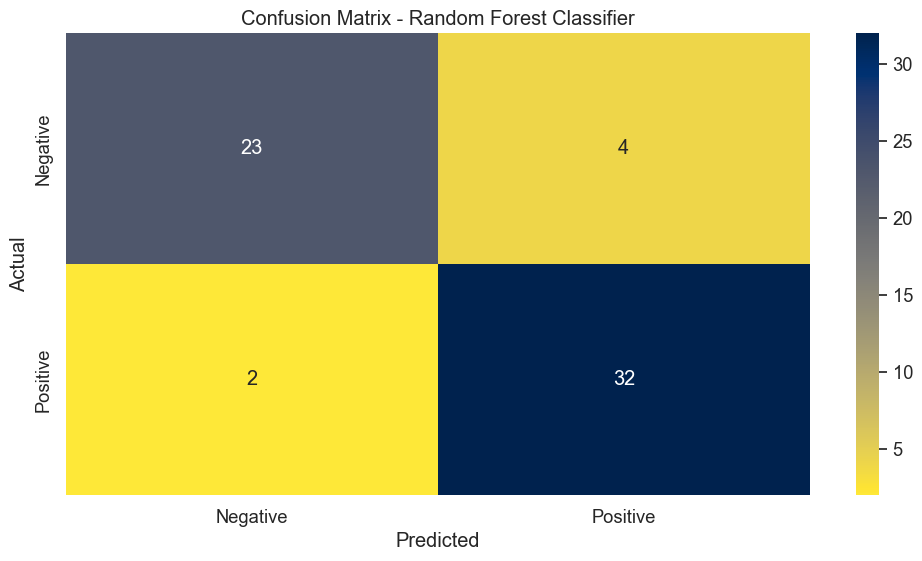

In [172]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have your true labels "Y_test" and predicted labels "Y_pred_rf"

# Calculate confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred_rf)

# Plotting
plt.figure(figsize=(12, 6))
sns.set(font_scale=1.2)  # Adjust font size

# Use seaborn heatmap for better aesthetics
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='cividis_r',
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')

# Save the plot
plt.savefig("RF_confusion_matrix.png")

# Show the plot
plt.show()

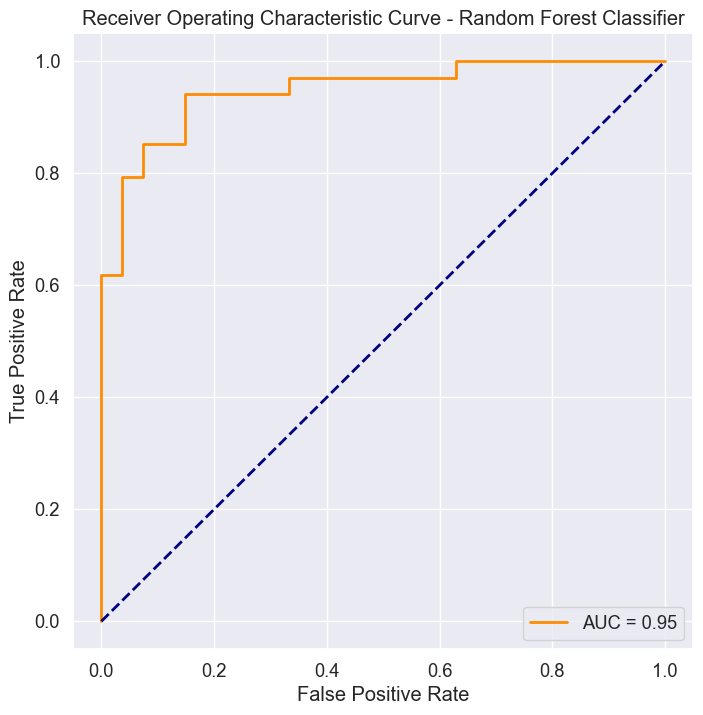

In [173]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming you have your trained Random Forest model "rf", test data "X_test", and true labels "Y_test"

# Get predicted probabilities for the positive class
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve - Random Forest Classifier')
plt.legend(loc='lower right')

# Save figure
plt.savefig("RF_ROC.png")

# Show the plot
plt.show()

In [174]:
Y_pred_rf = np.around(Y_pred_rf)
print(metrics.classification_report(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.89      0.94      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [175]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Level 0 models (Your existing implementations)
rf = RandomForestClassifier(n_estimators=100, random_state=42) 
svm = SVC(C=8.0, kernel='rbf', degree=3, gamma='scale', coef0=0.01, shrinking=True, 
     probability=True, tol=0.1, cache_size=300, class_weight=None, 
     verbose=False, max_iter=-1, decision_function_shape='ovo')

# Level 1 meta-learner
meta_learner = LogisticRegression()

# Create the stacking ensemble
forestsvm = StackingClassifier(estimators=[('rf', rf), ('svm', svm)], 
               final_estimator=meta_learner)

# Fit the ensemble model 
forestsvm.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_forestsvm = forestsvm.predict(X_test)

# Evaluate performance
score_forestsvm = round(accuracy_score(Y_pred_forestsvm, Y_test) * 100, 2)
print(score_forestsvm)
# accuracy = accuracy_score(Y_pred_ensemble, Y_test)
# print("Raw Accuracy:", accuracy)
# print("Calculated Percentage (score_ensemble):", score_ensemble)
# Evaluate performance
# score_ensemble = round(accuracy_score(Y_pred_ensemble, Y_test) * 100, 2)
print("Calculated Percentage (score_forestsvm):", score_forestsvm)
# print("Raw Accuracy:", accuracy_score(Y_pred_ensemble, Y_test))

85.25
Calculated Percentage (score_forestsvm): 85.25


The accuracy score achieved using ForestSVM is: 85.25 %
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



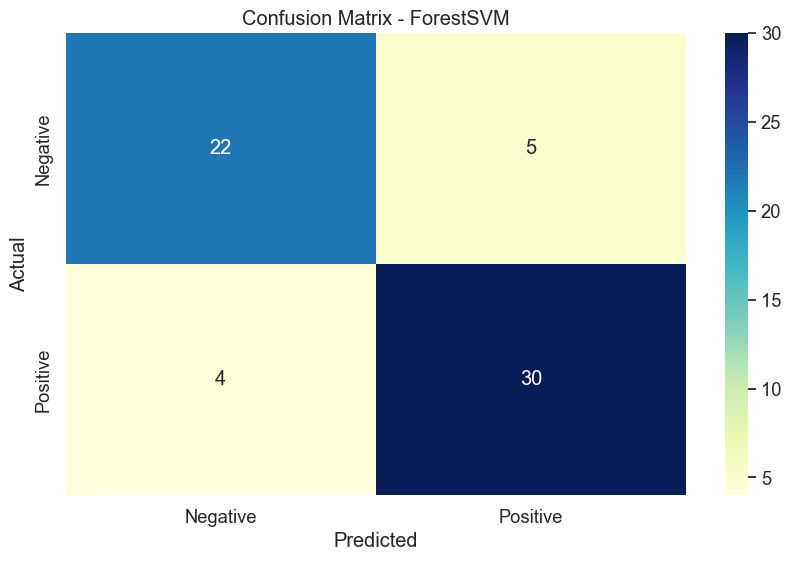

ForestSVM Metrics:
Precision: 0.86
Recall: 0.88
F1-Score: 0.87


In [176]:
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score 
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# ... Your code for data loading and preparation ...

# ------------------ Individual Models ------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(C=8.0, kernel='rbf', degree=3, gamma='scale', coef0=0.01, shrinking=True,
          probability=True, tol=0.1, cache_size=300, class_weight=None,
          verbose=False, max_iter=-1, decision_function_shape='ovo')


# ------------------ ForestSVM Ensemble ------------------
forestsvm = StackingClassifier(estimators=[('rf', rf), ('svm', svm)],
                               final_estimator=LogisticRegression())
forestsvm.fit(X_train, Y_train)

# ------------------ Calculate ForestSVM Score -------------- 
Y_pred_forestsvm = forestsvm.predict(X_test)
score_forestsvm = accuracy_score(Y_test, Y_pred_forestsvm)  
print(f"The accuracy score achieved using ForestSVM is: {score_forestsvm * 100:.2f} %") 

# ------------------ Other Evaluation Metrics ------------------
print(classification_report(Y_test, Y_pred_forestsvm))

# Confusion Matrix
conf_mat = confusion_matrix(Y_test, Y_pred_forestsvm)

# Plot Confusion Matrix
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ForestSVM') 
plt.savefig("forestsvm_confusion_matrix.png") 
plt.show()

# Additional Metrics
precision = precision_score(Y_test, Y_pred_forestsvm)
recall = recall_score(Y_test, Y_pred_forestsvm)
f1 = f1_score(Y_test, Y_pred_forestsvm)

print("ForestSVM Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


In [177]:
# Training step - Assuming you have variables 'X_train' and 'Y_train' 
svm.fit(X_train, Y_train)  


SVC(C=8.0, cache_size=300, coef0=0.01, decision_function_shape='ovo',
    probability=True, tol=0.1)

In [178]:
from sklearn.ensemble import RandomForestClassifier

# ... Your code for loading and preparing data ...

rf = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=8, random_state=42)
rf.fit(X_train, Y_train)



RandomForestClassifier(max_depth=8, random_state=42)

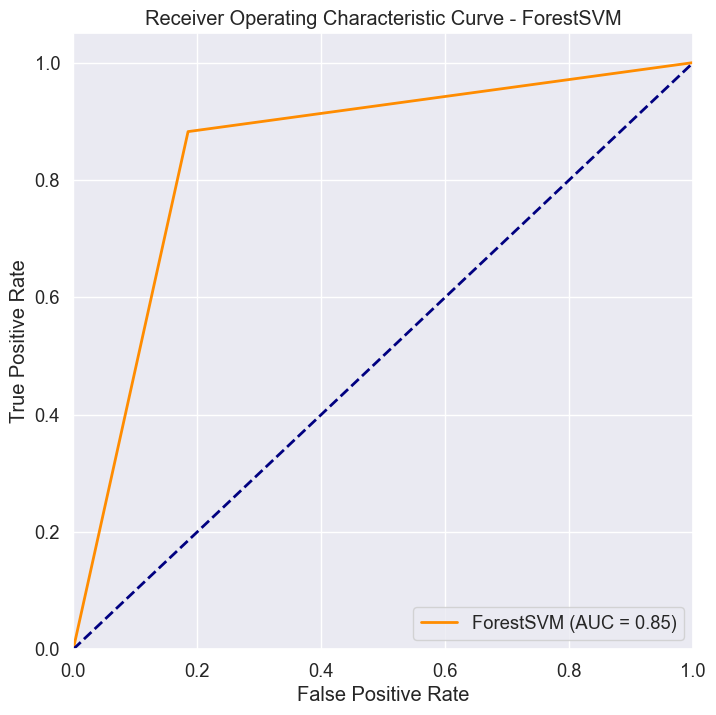

In [179]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# ... Your code for data loading and preparation ...

# ------------------ Individual Models ------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='rbf', C=8.0, gamma='scale', probability=True)

# ------------------ ForestSVM Ensemble ------------------
forestsvm = StackingClassifier(estimators=[('rf', rf), ('svm', svm)],
                               final_estimator=LogisticRegression(),
                               cv=5)  
forestsvm.fit(X_train, Y_train)

# ------------------ Generate Predictions ------------------
y_pred_forestsvm = forestsvm.predict(X_test) 

# ------------------ ROC Curve Calculation ------------------
fpr, tpr, _ = roc_curve(Y_test, y_pred_forestsvm) 
roc_auc = auc(fpr, tpr)

# ------------------ Plotting ------------------
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ForestSVM (AUC = {roc_auc:.2f})') 
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve - ForestSVM') 
plt.legend(loc='lower right')
plt.savefig("ForestSVM_ROC.png") 
plt.show()


In [180]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score 
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# ... Your code for data loading and preparation ...

# ------------------ Individual Models ------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='rbf', C=8.0, gamma='scale', probability=True)
# Add other individual models and their parameters as needed...

# ... Your code to train and calculate scores for individual models (if desired) ...

# ------------------ ForestSVM Ensemble ------------------
forestsvm = StackingClassifier(estimators=[('rf', rf), ('svm', svm)],
                               final_estimator=LogisticRegression(),
                               cv=5)  
forestsvm.fit(X_train, Y_train)

# ------------------ Calculate ForestSVM Score -------------- 
y_pred_forestsvm = forestsvm.predict(X_test) 
score_forestsvm = accuracy_score(Y_test, y_pred_forestsvm) * 100 
print(f"The accuracy score achieved using ForestSVM is: {score_forestsvm * 100:.2f} %") 

# ------------------ Other Evaluation Metrics ------------------
print(classification_report(Y_test, y_pred_forestsvm))

# Confusion Matrix
conf_mat = confusion_matrix(Y_test, y_pred_forestsvm) 
# ... Your existing code for plotting confusion matrix ... 

# ROC Curve (Optional)
fpr, tpr, _ = roc_curve(Y_test, y_pred_forestsvm) 
roc_auc = auc(fpr, tpr)
# ... Your existing code for plotting the ROC curve ... 


The accuracy score achieved using ForestSVM is: 8524.59 %
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [181]:
models = ["Logistic Regression", "Support Vector Machine", "Random Forest", "ForestSVM"] 
scores = [score_lr, score_svm, score_rf, score_forestsvm] # Assuming you've updated score_ensemble

for i in range(len(models)):
    print(f"The accuracy score achieved using {models[i]} is: {scores[i]:.2f} %")
    print("Score Stacking (before plotting):", scores[i])  
print("Scores list:", scores)


The accuracy score achieved using Logistic Regression is: 85.25 %
Score Stacking (before plotting): 85.25
The accuracy score achieved using Support Vector Machine is: 70.49 %
Score Stacking (before plotting): 70.49
The accuracy score achieved using Random Forest is: 90.16 %
Score Stacking (before plotting): 90.16
The accuracy score achieved using ForestSVM is: 85.25 %
Score Stacking (before plotting): 85.24590163934425
Scores list: [85.25, 70.49, 90.16, 85.24590163934425]


-----------------------
**`-8- Showing Final Scores`**
--------------------

In [182]:
models = ["Logistic Regression", "Support Vector Machine", "Random Forest", "Stacking Ensemble"] 
scores = [score_lr, score_svm, score_rf, score_forestsvm]

for i in range(len(models)):
    print(f"The accuracy score achieved using {models[i]} is: {scores[i]:.2f} %")
    print("Score (before plotting):", scores[i])  # Use scores[i] instead of score_stacking
print("Scores list:", scores)

The accuracy score achieved using Logistic Regression is: 85.25 %
Score (before plotting): 85.25
The accuracy score achieved using Support Vector Machine is: 70.49 %
Score (before plotting): 70.49
The accuracy score achieved using Random Forest is: 90.16 %
Score (before plotting): 90.16
The accuracy score achieved using Stacking Ensemble is: 85.25 %
Score (before plotting): 85.24590163934425
Scores list: [85.25, 70.49, 90.16, 85.24590163934425]


              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



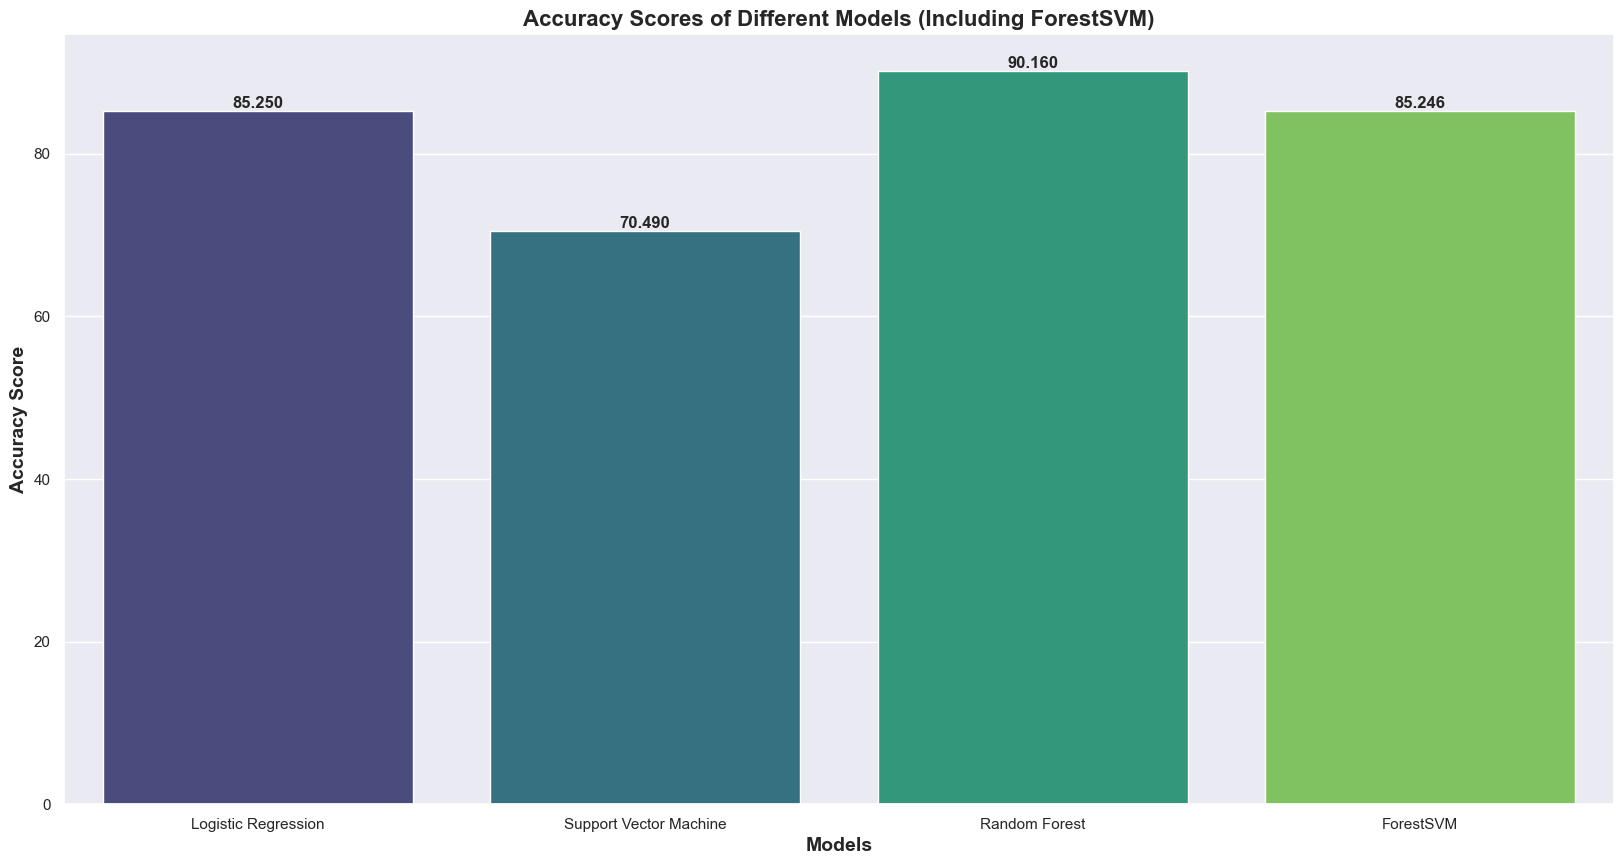

In [183]:
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score 
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# ------------------ Individual Models ------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='rbf', C=8.0, gamma='scale', probability=True)


# ------------------ ForestSVM Ensemble ------------------
forestsvm = StackingClassifier(estimators=[('rf', rf), ('svm', svm)],
                               final_estimator=LogisticRegression(),
                               cv=5)  
forestsvm.fit(X_train, Y_train)

# ------------------ Calculate ForestSVM Score -------------- 
y_pred_forestsvm = forestsvm.predict(X_test) 
score_forestsvm = accuracy_score(Y_test, y_pred_forestsvm) * 100 

# ------------------ Other Evaluation Metrics ------------------
print(classification_report(Y_test, y_pred_forestsvm))

# Confusion Matrix
conf_mat = confusion_matrix(Y_test, y_pred_forestsvm) 

# ROC Curve (Optional)
fpr, tpr, _ = roc_curve(Y_test, y_pred_forestsvm) 
roc_auc = auc(fpr, tpr)

# ------------------ Bar Plot for Model Scores ------------------
models = ["Logistic Regression", "Support Vector Machine", "Random Forest", "ForestSVM"] 
scores = [score_lr, score_svm, score_rf, score_forestsvm] # Assuming you have the necessary score variables

# Set the style and figure size
sns.set(style="darkgrid", rc={'figure.figsize': (20, 10)})

# Create a bar plot
ax = sns.barplot(x=models, y=scores, palette='viridis')

# Add annotations for accuracy scores on the bars
for i, score in enumerate(scores):
    ax.text(i, score + 0.005, f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

# Set labels and title
plt.xlabel("Models", loc='center', fontsize=14, fontweight='bold')
plt.ylabel("Accuracy Score", fontsize=14, fontweight='bold')
plt.title("Accuracy Scores of Different Models (Including ForestSVM)", fontsize=16, fontweight='bold') 

# Save the plot
plt.savefig("AccuracyScores.png")
plt.show()


In [184]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [185]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [186]:
Input = (63, 1, 3,145,233,1,0,150, 0, 2.3,0,0,1)

Input_array= np.asarray(Input)
Input_reshaped = Input_array.reshape(1,-1)

prediction = rf.predict(Input_reshaped)
prediction = np.around(prediction)

print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print("The Person will has a Heart Disease by %f "%(prediction))


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.